# Instructions

## Dataset and Goal

The Sarcasm on Reddit dataset provides comments posted on Reddit labeled as sarcastic (1) or not sarcastic (0). The task of the project is, given only the parent comment and the Reddit category (subreddit), to predict the probability of a parent comment to receive a sarcastic comment.

  

## Evaluation strategy

Cross-validation.

## Dataset

[Sarcasm on Reddit](https://www.kaggle.com/danofer/sarcasm)

## References

[Khodak, M., Saunshi, N., & Vodrahalli, K. (2017). A large self-annotated corpus for sarcasm](https://arxiv.org/abs/1704.05579)

[Eke, C. I., Norman, A. A., Shuib, L., & Nweke, H. F. (2019). Sarcasm identification in textual data: systematic review, research challenges and open directions. Artificial Intelligence Review, 1-44](https://link.springer.com/article/10.1007/s10462-019-09791-8)

[Joshi, A., Bhattacharyya, P., & Carman, M. J. (2017). Automatic sarcasm detection: A survey. ACM Computing Surveys (CSUR), 50(5), 1-22](https://dl.acm.org/doi/abs/10.1145/3124420)

# Project

## Import Dataset

In [1]:
import time         # calculate running time
import os           # access directory structure
import pandas as pd # data processing

open all files

In [2]:
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-balanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-unbalanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarc.csv.gz
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarcasm.csv


train-balanced-sarcasm.csv file

In [3]:
number_of_rows_to_read = None # 'None' to read the whole file in script
df_data = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/train-balanced-sarcasm.csv', delimiter=',', nrows = number_of_rows_to_read)
df_data.name = 'train-balanced-sarcasm.csv'
df_data.number_of_rows, df_data.number_of_cols = df_data.shape

print(f'There are {df_data.number_of_rows} rows and {df_data.number_of_cols} columns')

There are 1010826 rows and 10 columns


In [4]:
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
df_data.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


## Data Cleaning

drop NaNs tuples

In [6]:
df_data.isna().sum(axis=0)

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [7]:
na_comments = df_data["comment"].isna()
na_comments = df_data[na_comments].index
df_data.drop(   labels = na_comments,   # Index or column labels to drop.
                axis = 0,               # Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
                inplace = True)         # If False, return a copy. Otherwise, do operation inplace and return None.

check validity of ups and downs attributes

In [8]:
value_counts_downs = df_data["downs"].value_counts()
value_counts_downs

 0    863333
-1    147440
Name: downs, dtype: int64

In [9]:
value_count_ups = df_data["ups"].value_counts()
value_count_ups

 1       289577
-1       168042
 2       138984
 3        76593
 0        51848
          ...  
 2813         1
 764          1
-261          1
 762          1
 760          1
Name: ups, Length: 1171, dtype: int64

In [10]:
negative_ups = sum(df_data["ups"] < 0)
negative_ups

209162

## Data Exploration

percentual distribution of sarcastic and non-sarcastic comments by score

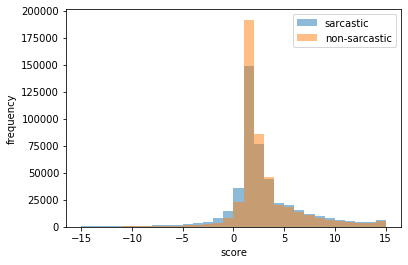

In [12]:
import matplotlib.pyplot as plt

score_sarcastic = df_data["score"][df_data["label"] == 1]
score_not_sarcastic = df_data["score"][df_data["label"] == 0]
bins = list(range(-15, 16)) # set number of bins in graph
plt.hist(score_sarcastic, bins = bins, alpha = 0.5, label = "sarcastic")
plt.hist(score_not_sarcastic, bins = bins, alpha = 0.5, label = "non-sarcastic")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc = "upper right") # position of legend

plt.savefig('sarcasm_distribution_by_score.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

percentual count distribution of sarcastic parent-comments by month

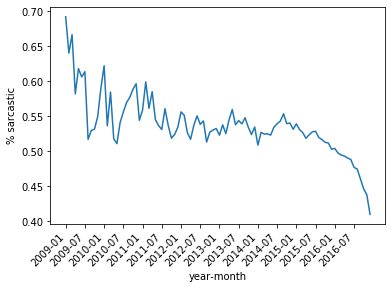

In [17]:
df_data_by_month = df_data.groupby("date").agg({"label" : "mean", "parent_comment" : "count"}) # group
months = list(df_data_by_month.index)
label_pos = list(range(0, len(months), 6))
m_labels = [months[i] for i in label_pos]

plt.plot(months, df_data_by_month["label"])
plt.xlabel("year-month")
plt.ylabel("% sarcastic")
plt.xticks(label_pos, m_labels, rotation=45, ha="right")

plt.savefig('sarcasm_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

number of parent comments by month

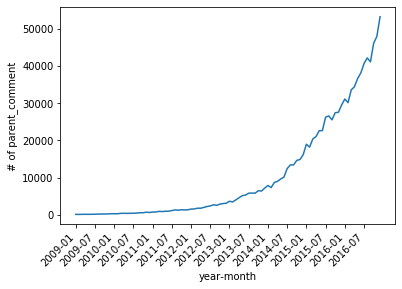

In [18]:
months = list(df_data_by_month.index)               # sorted list of months in df_data
label_position = list(range(0, len(months), 6))     # list of position of labels with monthly frame
month_labels = [months[i] for i in label_position]  # list of moth labels 

plt.plot(months, df_data_by_month["parent_comment"])
plt.xlabel("year-month")
plt.ylabel("# of parent_comment")
plt.xticks( ticks = label_position, # The list of xtick locations
            labels = month_labels,  # The labels to place at the given ticks locations
            rotation = 45,          # Rotation of labels displayed
            ha = "right")           # Direction of rotation

plt.savefig('commentnumber_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

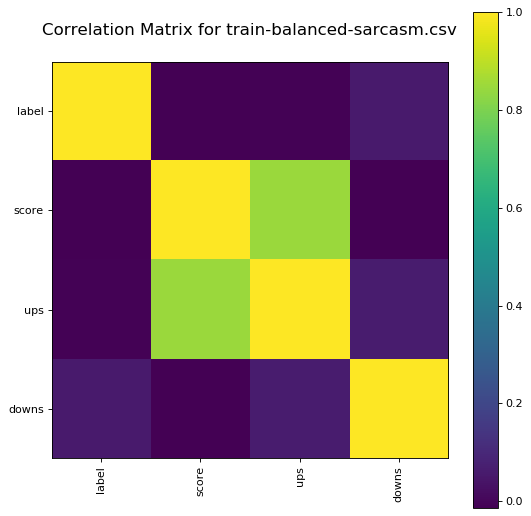

In [19]:
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, graph_width):
    _filename = df.name
    _df = df.dropna('columns') # handle columns with NaN values
    _df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    # error handling 
    if _df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({_df.shape[1]}) is less than 2')
        return
    
    _corr = _df.corr()
    
    plt.figure( num = None, 
                figsize = (graph_width, graph_width), 
                dpi = 80, 
                facecolor = 'w', 
                edgecolor ='k')

    _correlation_matrix = plt.matshow(_corr, fignum = 1)
    plt.xticks(range(len(_corr.columns)), _corr.columns, rotation=90)
    plt.yticks(range(len(_corr.columns)), _corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(_correlation_matrix)
    plt.title(f'Correlation Matrix for {_filename}', fontsize=15)
    plt.show()
    
plot_correlation_matrix(df_data, 8)

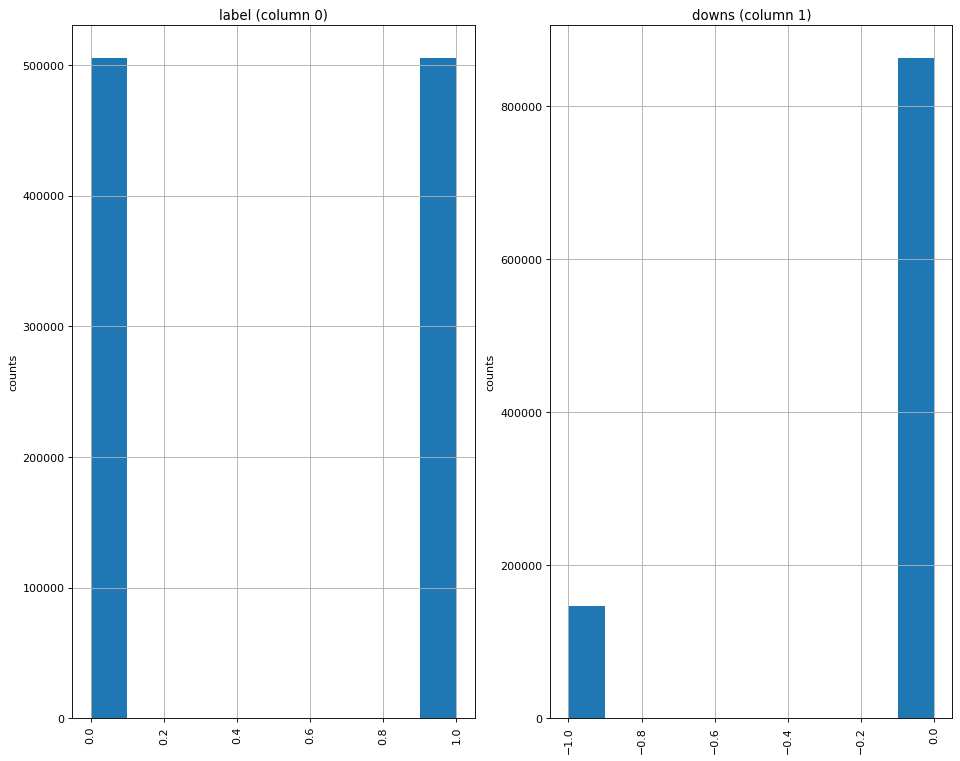

In [21]:
plot_per_column_distribution(df_data, 10, 5, filename = 'plot_per_column_distribution_df_data')

scatter and density plot

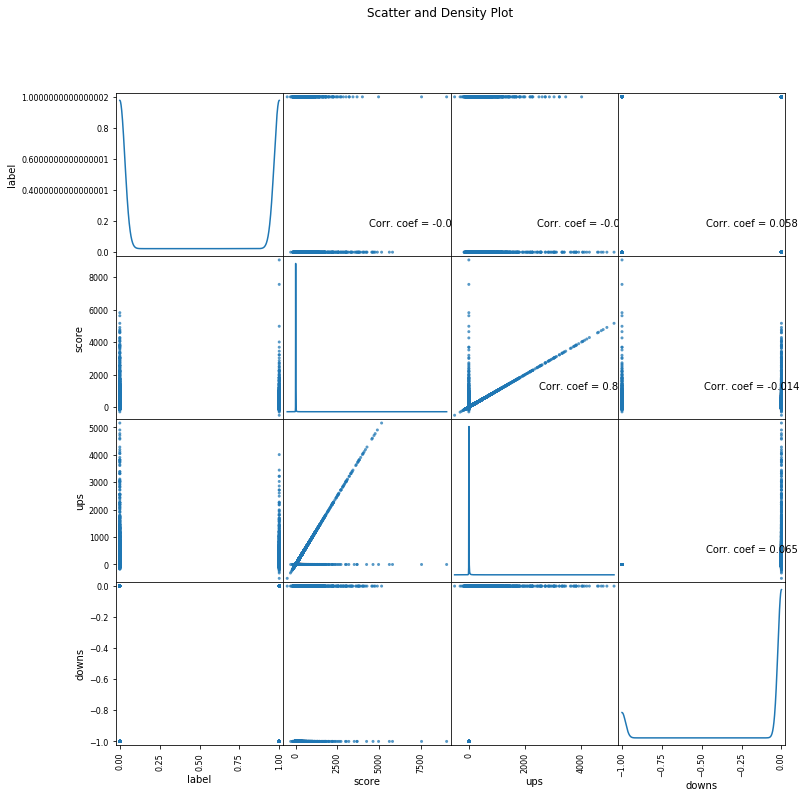

Execution time in seconds: 457.55094146728516


In [102]:
def plot_scatter_matrix(df, plot_size, text_size):
    df = df.select_dtypes(include = [np.number]) # keep only numerical columns
    
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    _column_names = list(df)
    
    if len(_column_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        _column_names = _column_names[:10]
    df = df[_column_names]
    ax = pd.plotting.scatter_matrix(df, alpha = 0.75, figsize = [plot_size, plot_size], diagonal = 'kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha = 'center', va = 'center', size = text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

start_time = time.time()

plot_scatter_matrix(df_data, 12, 10) # warning: slow

execution_time = (time.time() - start_time)

print('Execution time in seconds: ' + str(execution_time))

### Subreddits

number of subreddits

In [13]:
number_of_subreddits = len(df_data["subreddit"].unique())
number_of_subreddits

14876

most frequent subreddits

In [32]:
import dataframe_image as dfi

most_frequent_subreddits = df_data["subreddit"].value_counts()[0:25]
most_frequent_subreddits = list(most_frequent_subreddits.index)
most_frequent_subreddits_percentual = df_data[df_data["subreddit"].isin(most_frequent_subreddits)].groupby("subreddit").agg({"label" : "mean"})
most_frequent_subreddits_percentual_sorted = most_frequent_subreddits_percentual.sort_values(by = 'label',
                                                ascending = False)

dfi.export(most_frequent_subreddits_percentual_sorted, 'most_frequent_subreddits_percentual_sorted.png')
most_frequent_subreddits_percentual_sorted

,label
subreddit,
worldnews,0.642516
atheism,0.639555
TumblrInAction,0.609766
politics,0.605348
news,0.603457
technology,0.599965
pcmasterrace,0.566651
AdviceAnimals,0.560822
GlobalOffensive,0.552045


In [51]:
#TODO distibution plot

value_count_subreddits_series = df_data["subreddit"].value_counts()
most_frequent_value_count_subreddits_percentual = df_data[df_data["subreddit"]].groupby("subreddit").agg({"label" : "mean"})
most_frequent_value_count_subreddits_percentual

KeyError: "None of [Index(['politics', 'nba', 'nfl', 'BlackPeopleTwitter', 'MaddenUltimateTeam',\n       'AskReddit', 'AskReddit', 'FFBraveExvius', 'pcmasterrace',\n       'Lollapalooza',\n       ...\n       'WTF', 'atheism', 'gaming', 'WTF', 'politics', 'reddit.com', 'climate',\n       'atheism', 'worldnews', 'politics'],\n      dtype='object', length=1010773)] are in the [columns]"

In [49]:
value_count_subreddits_series

AskReddit          65674
politics           39493
worldnews          26376
leagueoflegends    21034
pcmasterrace       18987
                   ...  
assholegonewild        1
StrugglePorn           1
NameThatPokemon        1
KFC_Tacobell           1
mmgirls                1
Name: subreddit, Length: 14876, dtype: int64

## Train/Validation Split

In [11]:
df_model = df_data[['parent_comment', 'subreddit', 'label']]
df_model.head()

,parent_comment,subreddit,label
0,"Yeah, I get that argument. At this point, I'd ...",politics,0
1,The blazers and Mavericks (The wests 5 and 6 s...,nba,0
2,They're favored to win.,nfl,0
3,deadass don't kill my buzz,BlackPeopleTwitter,0
4,Yep can confirm I saw the tool they use for th...,MaddenUltimateTeam,0


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split( df_model, 
                                        test_size = 0.15, 
                                        random_state = 123) # shuffling applied before applying the split
test_data.shape

(151616, 3)

In [13]:
train_comments = train_data['parent_comment']
test_comment = test_data['parent_comment']

train_subreddit = train_data['subreddit']
test_subreddit = test_data['subreddit']

train_comments_and_subreddits = train_data[['parent_comment', 'subreddit']]
test_comments_and_subreddits = test_data[['parent_comment', 'subreddit']]

train_label = train_data['label']
test_label = test_data['label']

In [14]:
############## just to code: add _slim keyword ##############
df_model_slim , df_model_slim_useless =  train_test_split( df_model, 
                                                        test_size = 0.7, 
                                                        random_state = 123) # shuffling applied before applying the split
train_data_slim, test_data_slim = train_test_split( df_model_slim, 
                                                        test_size = 0.2, 
                                                        random_state = 123) # shuffling applied before applying the split

train_comments_slim = train_data_slim['parent_comment']
test_comment_slim = test_data_slim['parent_comment']

train_subreddit_slim = train_data_slim['subreddit']
test_subreddit_slim = test_data_slim['subreddit']

train_comments_and_subreddits_slim = train_data_slim[['parent_comment', 'subreddit']]
test_comments_and_subreddits_slim = test_data_slim[['parent_comment', 'subreddit']]

train_label_slim = train_data_slim['label']
test_label_slim = test_data_slim['label']

############## just to code: add _slim keyword ##############

check if train and test split is balanced

In [19]:
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_distribution(df, number_of_graphs_shown, number_of_graph_per_rows, filename):
    nunique = df.nunique() # Count distinct observations over requested axis
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # pick columns that have between 1 and 50 unique values
    _number_of_rows, _number_of_cols = df.shape
    _column_names = list(df)
    _number_of_graph_rows = (_number_of_cols + number_of_graph_per_rows - 1) / number_of_graph_per_rows
    plt.figure(num = None, figsize = (6 * number_of_graph_per_rows, 8 * _number_of_graph_rows), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
    for i in range(min(_number_of_cols, number_of_graphs_shown)):
        plt.subplot(_number_of_graph_rows, number_of_graph_per_rows, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{_column_names[i]} (column {i})')
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    
    # save image
    plt.savefig(filename + ".png", 
                bbox_inches = 'tight', 
                pad_inches = 0.15) # savefig() before show()
    # show image
    plt.show()

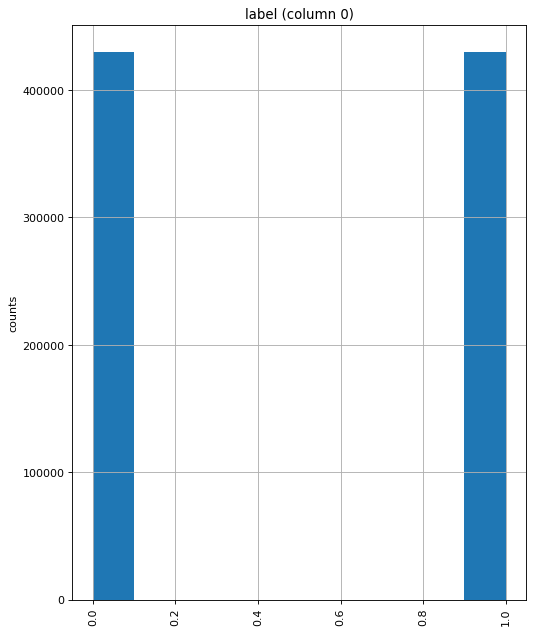

In [20]:
plot_per_column_distribution(train_data, 10, 5, "train_data_count_barplot")

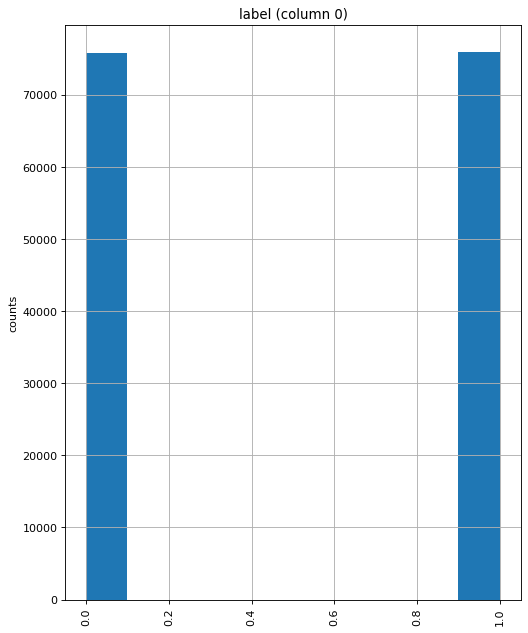

In [21]:
plot_per_column_distribution(test_data, 10, 5, "test_data_count_barplot")

## Model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate

import stopwords from nltk library

In [31]:
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

In [32]:
token_count_matrix = CountVectorizer(   strip_accents = 'unicode', 
                                        stop_words = stop_words_en, 
                                        min_df = 0.0001, 
                                        max_df = 0.70)
token_count_matrix

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=None, min_df=0.0001,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [33]:
train_bow = token_count_matrix.fit_transform(train_comments_and_subreddits) #FIXME: change _slim
train_bow

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [35]:
tfidf_trans_normalized = TfidfTransformer()
train_tfidf = tfidf_trans_normalized.fit_transform(train_bow)

### Logistic Regression

make a classifier using Logistic Regresssion only for comment attribute with a Bag of Words

In [33]:
%time
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state = 123)
cross_validate(log_reg_model, train_bow, train_label_slim, cv = 2, scoring = "accuracy", n_jobs =- 1)

Wall time: 0 ns


{'fit_time': array([2.59306908, 2.75562692]),
 'score_time': array([0.02692413, 0.0229733 ]),
 'test_score': array([0.54992085, 0.54950862])}

In [34]:
log_reg_model = LogisticRegression(random_state = 42, penalty = "elasticnet", solver = "saga")

pipeline = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', log_reg_model)
])

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000),
    'model__l1_ratio': (0.0, 0.25, 0.50, 0.75, 1.0)
}

In [35]:
%time
grid_logreg = GridSearchCV(pipeline, param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)
grid_logreg.fit(train_comments_slim, train_label_slim)

Wall time: 0 ns


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=0.0001,
                                                        ngram_range=(1, 1),
                                                       

In [37]:
print(grid_logreg.best_index_)
print(grid_logreg.best_params_)
print(grid_logreg.best_score_)
print(grid_logreg.__dict__)

35
{'model__l1_ratio': 0.75, 'vect__max_features': 30000, 'vect__ngram_range': (1, 3)}
0.5651403225274544
{'scoring': 'accuracy', 'estimator': Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=None, min_df=0.0001,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you...
                ('tftrans',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
  

### Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

#token_count_matrix = CountVectorizer(strip_accents='unicode', stop_words = stop_words_en, min_df = 0.0001, max_df = 0.70)
tf_trans = TfidfTransformer()

# instantiate the Naive Bayes model
nb_model = MultinomialNB()

# instantiate Pipeline for model 
model = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', nb_model)
])

# instantiate dictionary with parameters
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000)
}

# instantiate a GridSearchCV object
grid_nb = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)

In [40]:
%%time
grid_nb.fit(train_comments_slim, train_label_slim)

Wall time: 3min 4s


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=0.0001,
                                                        ngram_range=(1, 1),
                                                       

In [41]:
grid_nb_cv_results = pd.DataFrame(grid_nb.cv_results_)
grid_nb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__max_features,param_vect__ngram_range,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,8.193583,0.013461,6.775878,0.012968,5000,"(1, 1)","{'vect__max_features': 5000, 'vect__ngram_rang...",0.568430,0.566929,0.567680,0.000750,1
1,22.308830,0.054355,11.261382,0.029420,5000,"(1, 2)","{'vect__max_features': 5000, 'vect__ngram_rang...",0.567449,0.566732,0.567090,0.000359,7
2,42.721730,0.020942,20.620348,0.187997,5000,"(1, 3)","{'vect__max_features': 5000, 'vect__ngram_rang...",0.567457,0.566756,0.567107,0.000350,6
3,8.488795,0.138130,8.186106,0.185503,15000,"(1, 1)","{'vect__max_features': 15000, 'vect__ngram_ran...",0.568125,0.566987,0.567556,0.000569,2
4,34.345136,0.246341,12.336506,0.147108,15000,"(1, 2)","{'vect__max_features': 15000, 'vect__ngram_ran...",0.567704,0.566229,0.566966,0.000738,9
5,43.513611,0.645275,13.374230,0.006982,15000,"(1, 3)","{'vect__max_features': 15000, 'vect__ngram_ran...",0.567894,0.566657,0.567276,0.000618,4
6,7.847505,0.001489,6.960382,0.118684,30000,"(1, 1)","{'vect__max_features': 30000, 'vect__ngram_ran...",0.568125,0.566987,0.567556,0.000569,2
7,22.756632,0.252825,9.893038,0.083278,30000,"(1, 2)","{'vect__max_features': 30000, 'vect__ngram_ran...",0.567968,0.566179,0.567074,0.000895,8
8,27.122954,0.042387,8.121280,0.034904,30000,"(1, 3)","{'vect__max_features': 30000, 'vect__ngram_ran...",0.568092,0.566402,0.567247,0.000845,5


In [42]:
print(f'Naive Bayes predictor best score is : {grid_nb.best_score_}')
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_nb.best_params_[param_name]))

Naive Bayes predictor best score is : 0.5676796491112357
vect__max_features: 5000
vect__ngram_range: (1, 1)


Accuracy Score: 57.51% 



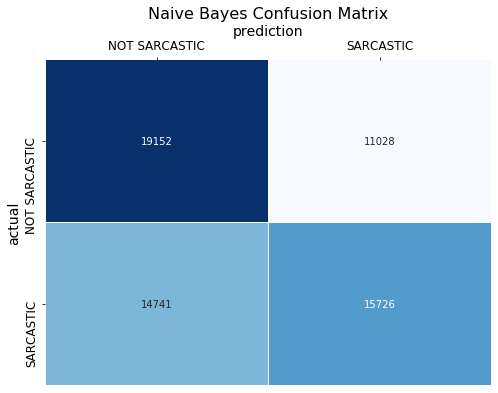

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# print accuracy score
predictions = grid_nb.predict(test_comment_slim) #FIXME
print('Accuracy Score: {:.2%}'.format(accuracy_score(test_label_slim, predictions)),'\n') #FIXME

# confusion matrix
cm = pd.DataFrame(confusion_matrix(test_label_slim, predictions), #FIXME 
                    index = ['NOT SARCASTIC', 'SARCASTIC'],
                    columns=['NOT SARCASTIC', 'SARCASTIC'])

fig = plt.figure(figsize = (8, 6))
ax = sns.heatmap(cm, annot = True,
                    cbar = False, 
                    cmap = 'Blues',
                    linewidths = 0.5,
                    fmt = '.0f')
ax.set_title('Naive Bayes Confusion Matrix',
                fontsize = 16,
                y = 1.25)
ax.set_ylabel('actual', fontsize = 14)
ax.set_xlabel('prediction', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)

train Naive Bayes with comments and subreddit

In [49]:
print(train_comments_and_subreddits_slim.shape)
print(train_label_slim.shape)

(242584, 2)
(242584,)


In [53]:
%%time

#TODO

token_count_matrix = CountVectorizer(   strip_accents = 'unicode', 
                                        stop_words = stop_words_en, 
                                        min_df = 0.0001, 
                                        max_df = 0.70)

train_bow = token_count_matrix.fit_transform(train_comments_and_subreddits_slim)

tfidf_trans_normalized = TfidfTransformer()
train_tfidf = tfidf_trans_normalized.fit_transform(train_bow)

########################################################################################
from sklearn.naive_bayes import MultinomialNB

tf_trans = TfidfTransformer()

# instantiate the Naive Bayes model
nb_model = MultinomialNB()

# instantiate Pipeline for model 
model = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', nb_model)
])

# instantiate dictionary with parameters
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000)
}

# instantiate a GridSearchCV object
grid_nb = GridSearchCV(estimator = model, 
                        param_grid = param_grid, 
                        scoring = "accuracy", 
                        cv = 2, 
                        n_jobs =- 1)

########################################################################################
grid_nb.fit(train_comments_and_subreddits_slim, train_label_slim)

ValueError: Found input variables with inconsistent numbers of samples: [2, 242584]

### Support Vector Machine

In [37]:
from sklearn.linear_model import SGDClassifier

svm_model = SGDClassifier(  penalty = "elasticnet", 
                            random_state = 42, 
                            n_jobs =- 1)

model = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', svm_model)
])

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000),
    'model__l1_ratio': (0.0, 0.15, 0.40, 0.60, 0.85, 1.0)
}

grid_svm = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)

In [21]:
%%time
grid_svm.fit(train_comments_slim, train_label_slim)

Wall time: 16min 30s


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=0.0001,
                                                        ngram_range=(1, 1),
                                                       

In [22]:
print(f'Support Vector Machines predictor best score is : {grid_svm.best_score_}')
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_svm.best_params_[param_name]))

Support Vector Machines predictor best score is : 0.5668758038452659
model__l1_ratio: 0.0
vect__max_features: 30000
vect__ngram_range: (1, 2)


comments and subreddit

In [41]:
train_comments_and_subreddits_slim.shape
#train_label_slim.shape

(242584, 2)

In [42]:
%%time
grid_svm.fit(train_comments_and_subreddits_slim, train_label_slim)

ValueError: Found input variables with inconsistent numbers of samples: [2, 242584]

choose a model

In [40]:
%%time
# recreate the vectorizer and transformer so they are not fit yet
vect = CountVectorizer(strip_accents = 'unicode', 
                        stop_words = stopwords, 
                        min_df = 0.0001, 
                        max_df = 0.70, 
                        max_features = 15000, 
                        ngram_range = (1, 3))
# create the NB model
nb_model = MultinomialNB()

# instantiate Pipeline for model 
chosen_model = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', nb_model)
])

chosen_model.fit(train_comments, train_label)

Wall time: 25.3 s


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=None, min_df=0.0001,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you...
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents='unicode',
        

Evaluate the Model

In [41]:
predictions = chosen_model.predict(X_test)
print('Accuracy Score: {:.2%}'.format(accuracy_score(y_test,predictions)),'\n')

NameError: name 'X_test' is not defined

In [ ]:
# Plot Confusion Matrix

cm = pd.DataFrame(confusion_matrix(y_test,predictions), index=['NOT SARCASTIC','SARCASTIC'],columns=['NOT SARCASTIC','SARCASTIC'])

fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Blues',linewidths=0.5,fmt='.0f')
ax.set_title('SARCASM DETECTION CONFUSION MATRIX',fontsize=16,y=1.25)
ax.set_ylabel('ACTUAL',fontsize=14)
ax.set_xlabel('PREDICTED',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)